## Code to manually synchronize 2 recordings

First visualization of the beginning of two recordings. 
The user manually determines the point of synchrony and sets the time point of synchronization. Afterwards the file will be cut to that point and the start the time measure from there. 

*caution: this potentially renders the gyroscope data unusable*

In [3]:
import matplotlib.pyplot as plt
import os 
import numpy as np
import pandas as pd
from datetime import datetime

data_dir = os.path.join('C:\\', 'Users', 'Sabrina', 'Documents', 'master_thesis', '#study_27_07_20', '005')
working_dir = os.path.join('C:\\', 'Users', 'Sabrina', 'Documents', 'master_thesis', '#study_27_07_20', '005')

# adapt path and variable name
open_name_1 = os.path.join(data_dir, 'eSense_0237', 'Experiment_27_07_2020_01_10_04_pm.xls')
open_name_2 = os.path.join(data_dir, 'eSense_0308', 'Experiment_27_07_2020_01_05_47_nachm..xls')
save_name_1 = os.path.join(working_dir, 'eSense_0237', 'synchronized_whole.xls')
save_name_2 = os.path.join(working_dir, 'eSense_0308', 'synchronized_whole.xls')

settings = {'sampling rate': 25, 'acc_range': 4, 'gyro_range': 1000, 'acc_LPF': 10 , 'gyro_LPF': 10} # note: acc range in G, gyro range in deg/s
header = ['time', 'acc_X_in_G', 'acc_Y_in_G', 'acc_Z_in_G', 'gyro_X_in_deg_s', 'gyro_Y_in_deg_s', 'gyro_Z_in_deg_s', 'activity_label', 'activity', 'on_off_label'] # according to app saving


## Read Files

In [4]:
# open excel file
df_1 = pd.read_excel(io=open_name_1, sheet_name="Experiment", names=header)
df_2 = pd.read_excel(io=open_name_2, sheet_name="Experiment", names=header)

# remove empty first row
df_1 = df_1.drop(0)
df_2 = df_2.drop(0)

# assign correct datatypes to columns
dtypes = {k: float for k in header[:0]}
dtypes.update({k: str for k in header[7:]})
df_1 = df_1.astype(dtypes)
df_2 = df_2.astype(dtypes)

# change time to first entry = 0
first_value = df_1.loc[1, 'time']
df_1['time'] = df_1['time']-first_value
first_value = df_2.loc[1, 'time']
df_2['time'] = df_2['time'] - first_value

df_1

,time,acc_X_in_G,acc_Y_in_G,acc_Z_in_G,gyro_X_in_deg_s,gyro_Y_in_deg_s,gyro_Z_in_deg_s,activity_label,activity,on_off_label
1,0.0,-0.219971,-0.504883,0.816162,0.030488,1.798780,2.652439,7.0,Experiment,OFF
2,1.0,-0.219604,-0.456421,0.809082,12.195122,-4.420732,-3.810976,7.0,Experiment,OFF
3,1.0,-0.186768,-0.474976,0.880737,18.353659,-4.298780,-3.445122,7.0,Experiment,OFF
4,90.0,-0.220215,-0.440186,0.836426,4.542683,-9.573171,0.518293,7.0,Experiment,OFF
5,91.0,-0.222534,-0.422974,0.829468,-9.634146,-7.896341,2.408537,7.0,Experiment,OFF
...,...,...,...,...,...,...,...,...,...,...
21830,880661.0,-0.882690,-0.406982,0.345825,39.207317,16.097561,71.006098,7.0,Experiment,OFF
21831,880661.0,-0.863159,-0.379150,0.349243,29.207317,9.512195,59.451220,7.0,Experiment,OFF
21832,880749.0,-0.864136,-0.355835,0.352905,28.384146,0.000000,51.219512,7.0,Experiment,OFF
21833,880750.0,-0.870728,-0.300415,0.328125,28.689024,-17.073171,47.926829,7.0,Experiment,OFF


## Visualize First X ms

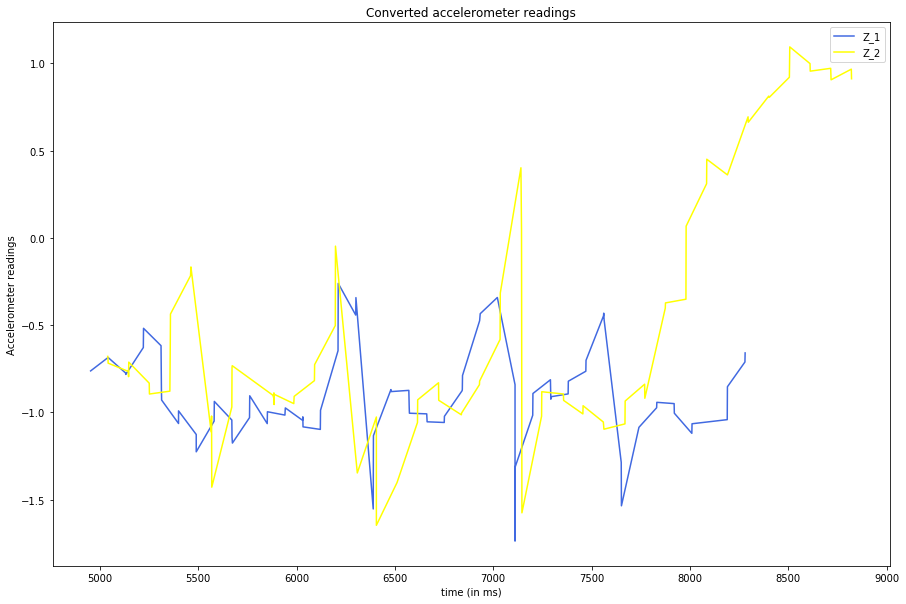

In [10]:
def get_limit_index(df, column, limit):
    mask = df[column] >= limit
    idx = next(iter(mask.index[mask]), 'not exist')
    return idx

def plot_acc(df_1, df_2, start, limit):
    # get first row corresponding to start value
    start = get_limit_index(df_2, 'time', start)
    # get last row corresponding to end value
    limit = get_limit_index(df_2, 'time', limit)-1
    # accelerometer
    plt.figure(figsize=(15,10))
    plt.title('Converted accelerometer readings')
    # axes of first dataframe (blue)
    #plt.plot(df_1.loc[start:limit, 'time'], df_1.loc[start:limit, 'acc_X_in_G'], label='X_1', color="lightsteelblue")
    #plt.plot(df_1.loc[start:limit, 'time'], df_1.loc[start:limit, 'acc_Y_in_G'], label='Y_1', color="midnightblue")
    plt.plot(df_1.loc[start:limit:, 'time'], df_1.loc[start:limit, 'acc_Z_in_G'], label='Z_1', color ="royalblue")
    # axes of second dataframe (yellow)
    #plt.plot(df_2.loc[start:limit, 'time'], df_2.loc[start:limit, 'acc_X_in_G'], label='X_2', color="khaki")
    #plt.plot(df_2.loc[start:limit, 'time'], df_2.loc[start:limit, 'acc_Y_in_G'], label='Y_2', color="orange")
    plt.plot(df_2.loc[start:limit:, 'time'], df_2.loc[start:limit, 'acc_Z_in_G'], label='Z_2', color ="yellow")
    plt.xlabel('time (in ms)')
    plt.ylabel('Accelerometer readings')
    plt.legend()
    plt.show()

plot_acc(df_1, df_2, 5000, 9000)

In [39]:
# time range of first sensor (blue) in which max/min sync spot is found
# - adapt the observed lower bound and upper bound values
## advice: change scale of graph and listen in to audio
start = get_limit_index(df_1, 'time', 8500) # blue
end = get_limit_index(df_1, 'time', 8700)
sync_idx_1 = df_1.loc[start:end, 'acc_Z_in_G'].idxmax(axis=1) 

start = get_limit_index(df_2, 'time', 8700) # yellow
end = get_limit_index(df_2, 'time', 9200)
sync_idx_2 = df_2.loc[start:end, 'acc_Z_in_G'].idxmax(axis=1) 

# cut the dataframes to have the sync time as 0
sync_df_1 = df_1.loc[sync_idx_1:]
sync_df_2 = df_2.loc[sync_idx_2:]

# subtract so first value is zero
first_value = sync_df_1.loc[sync_idx_1, 'time']
sync_df_1['time'] = sync_df_1['time'] - first_value
first_value = sync_df_2.loc[sync_idx_2, 'time']
sync_df_2['time'] = sync_df_2['time'] - first_value

# save synced files as xls files
sync_df_1.to_excel(save_name_1, sheet_name="Experiment", index=False)
sync_df_2.to_excel(save_name_2, sheet_name="Experiment", index=False)

C:\Users\Sabrina\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Sabrina\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
